In [1]:
from arcgis.gis import GIS
gis = GIS("https://www.arcgis.com", "DavidJVitale")

Enter password: ········


In [4]:
usa_map = gis.map('USA', zoomlevel=4)  # you can specify the zoom level when creating a map
usa_map

MapView(zoom=4.0)

## Add web layers from item

<Item title:"Race Demographics in the 2010 Census" type:Feature Layer Collection owner:Federal_User_Community>
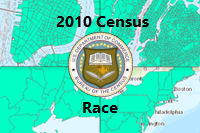

In [5]:
from arcgis.gis import *
item = gis.content.get('2158ce05955d4c529636b9fa0943193f')
usa_map.add_layer(item, {"renderer" : "ClassedColorRenderer",
                         "field_name" : "TOTPOP10",
                         "opacity": 0.7})
item

### Add Layer from CSV

In [6]:
import pandas as pd
df = pd.read_csv('data/chennai-rainfall.csv')
df.head()

,WEATHER STATION,LOCATION,RAINFALL
0,TAMBARAM,"TAMBARAM, TAMIL NADU",49
1,CHEMBARABAKKAM,"CHEMBARABAKKAM, TAMIL NADU",47
2,MARAKKANAM,"MARAKKANAM, TAMIL NADU",42
3,CHENGALPATTU,"CHENGALPATTU, TAMIL NADU",39
4,PONNERI,"PONNERI, TAMIL NADU",39


In [7]:
# Create an arcgis.features.FeatureCollection object by importing the pandas dataframe with an address field
rainfall = gis.content.import_data(df, {"Address" : "LOCATION"})
rainfall

<FeatureCollection>

In [8]:
tamil_map = gis.map("Tamil Nadu", zoomlevel=7)
tamil_map.add_layer(rainfall, { "renderer":"ClassedSizeRenderer",
                                 "field_name":"RAINFALL" })

tamil_map

MapView(zoom=7.0)

### Save map

In [9]:
item_properties={'title':'Rainfall in Tamil',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

In [11]:
webmap_item = tamil_map.save(item_properties)
webmap_item

<Item title:"Rainfall in Tamil" type:Web Map owner:DavidJVitale>